In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Import and Cleaning

In [2]:
movies = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings.csv')

C:\Users\khanf\AppData\Local\Temp\ipykernel_6836\2100325033.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_metadata.csv')


In [3]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [5]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [7]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.602429e+07,2.602429e+07,2.602429e+07,2.602429e+07
mean,1.350371e+05,1.584911e+04,3.528090e+00,1.171258e+09
std,7.817620e+04,3.108526e+04,1.065443e+00,2.052889e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.716400e+04,1.073000e+03,3.000000e+00,9.907545e+08
50%,1.351630e+05,2.583000e+03,3.500000e+00,1.151716e+09
75%,2.026930e+05,6.503000e+03,4.000000e+00,1.357578e+09
max,2.708960e+05,1.762750e+05,5.000000e+00,1.501830e+09


In [8]:
movies.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
movies.fillna({'revenue': 0, 'runtime': 0}, inplace=True)

In [10]:
movies.dropna(subset=['release_date'], inplace=True)

In [11]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

In [12]:
import ast
movies['genres'] = movies['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if pd.notna(x) else [])

In [13]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Distribution of Movie Ratings

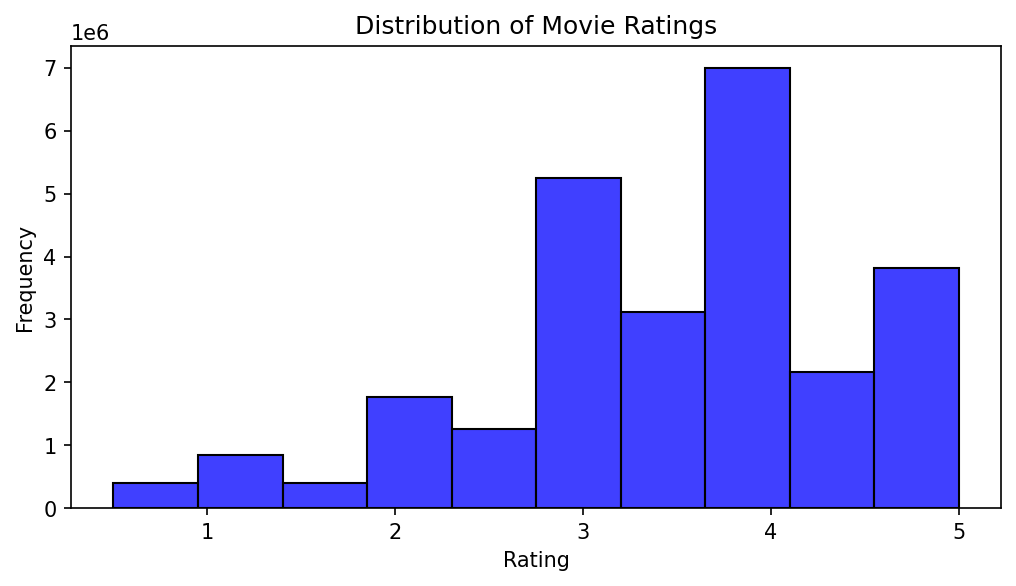

In [53]:
plt.figure(figsize=(8,4),dpi=150)
sns.histplot(ratings['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [15]:
movies_exploded = movies.explode('genres')

In [16]:
movies_exploded

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Animation,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Comedy,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Family,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,Adventure,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
1,False,NaN,65000000.0,Fantasy,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45463,False,NaN,0.0,Action,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45463,False,NaN,0.0,Drama,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45463,False,NaN,0.0,Thriller,NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0.0,NaN,NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [17]:
genre_popularity = movies_exploded['genres'].value_counts()

In [18]:
genre_popularity

genres
Drama                                    20255
Comedy                                   13181
Thriller                                  7619
Romance                                   6733
Action                                    6592
Horror                                    4670
Crime                                     4305
Documentary                               3921
Adventure                                 3494
Science Fiction                           3042
Family                                    2768
Mystery                                   2464
Fantasy                                   2313
Animation                                 1932
Foreign                                   1621
Music                                     1598
History                                   1397
War                                       1323
Western                                   1042
TV Movie                                   766
Carousel Productions                         1
Vision

# Top 10 Genres by Number of Movies

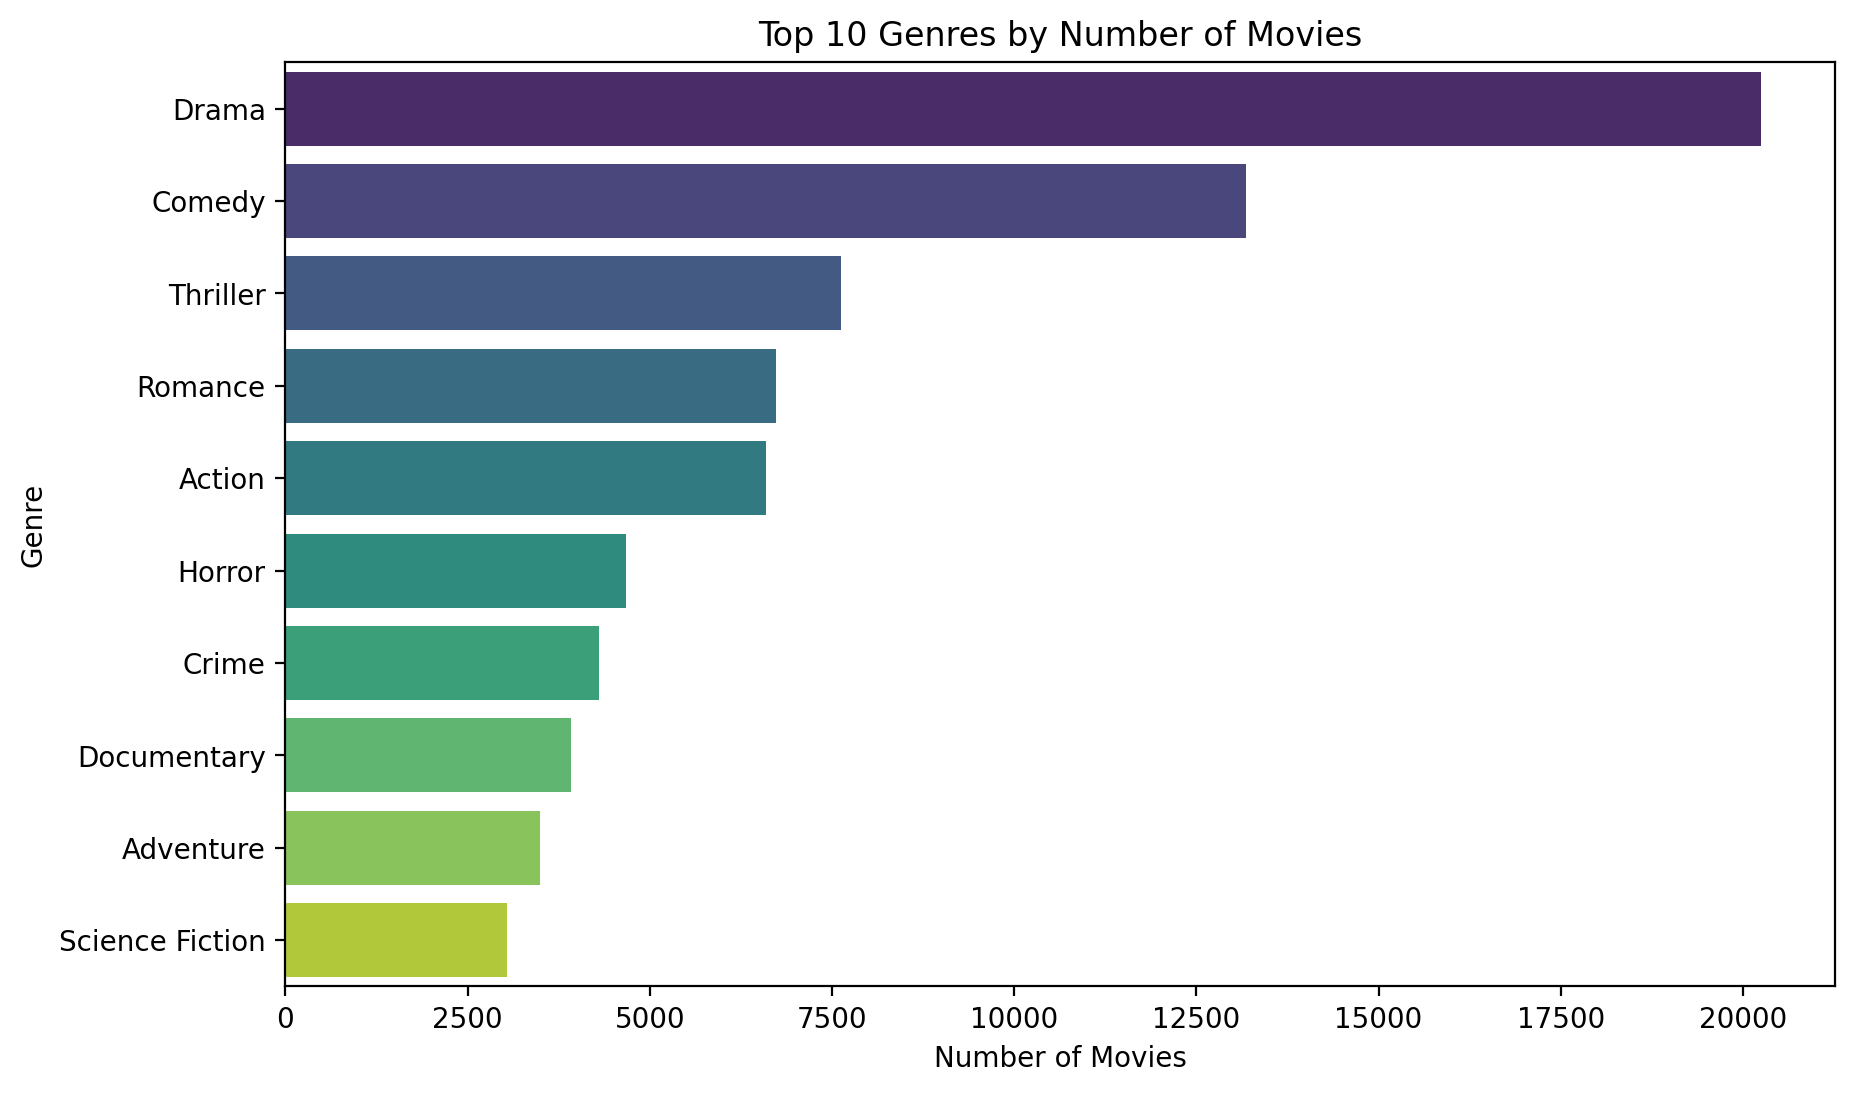

In [19]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(x=genre_popularity.values[:10], y=genre_popularity.index[:10], palette='viridis')
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Revenue vs Budget for Movies

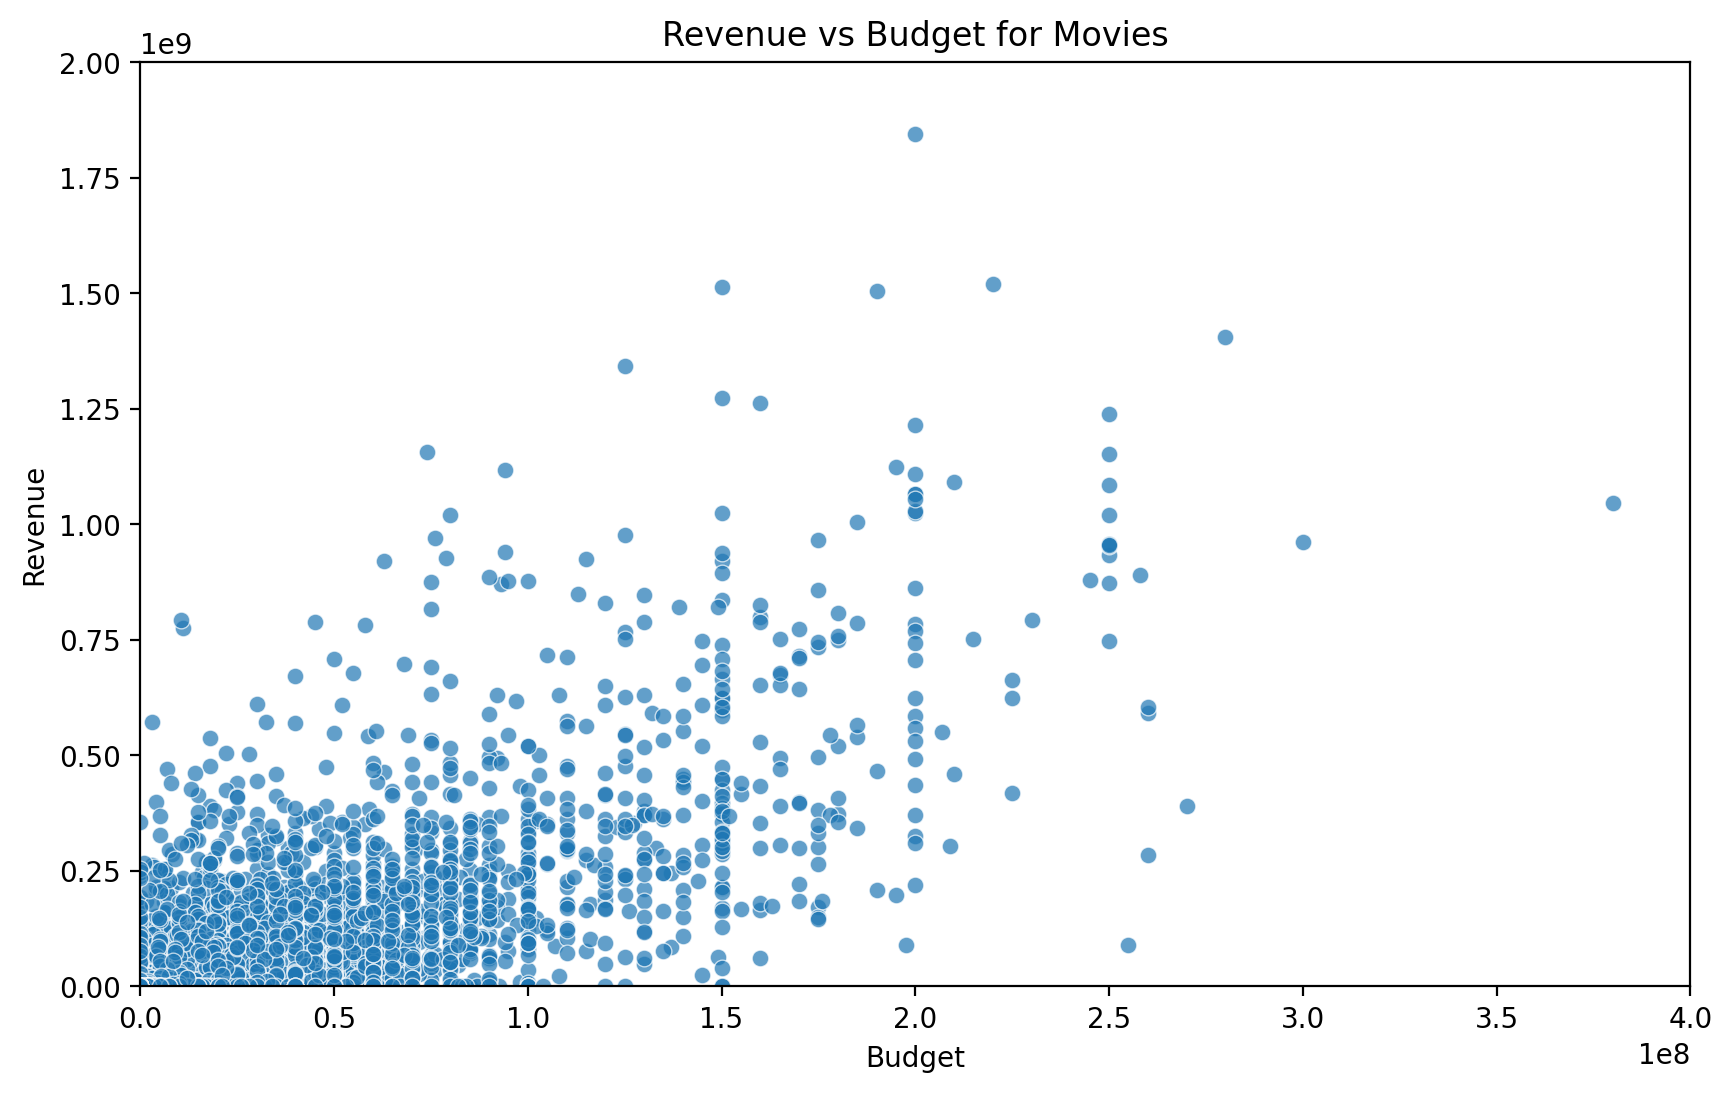

In [20]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(x=movies['budget'], y=movies['revenue'], alpha=0.7)
plt.title('Revenue vs Budget for Movies')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xlim(0, 4e8)  
plt.ylim(0, 2e9)
plt.show()

# Building a Recommender System

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
print(ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [23]:
ratings['userId'] = ratings['userId'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)
ratings['rating'] = ratings['rating'].astype(float)

In [24]:
duplicates = ratings[ratings.duplicated()]

In [25]:
chunk_size = 100000
ratings_subset = pd.read_csv('ratings.csv', nrows=chunk_size)

In [26]:
ratings_subset.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


# Collaborative Filtering Using Cosine Similarity

In [27]:
user_movie_matrix = ratings_subset.pivot_table(index='userId', columns='movieId', values='rating', fill_value=0)

In [28]:
user_movie_matrix.fillna(0, inplace=True)

In [29]:
user_similarity = cosine_similarity(user_movie_matrix)

C:\Users\khanf\anaconda3\lib\site-packages\sklearn\utils\extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [30]:
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

In [31]:
def get_similar_users(user_id, user_similarity_df, n=5):
    similarity_scores = user_similarity_df[user_id]
    similar_users = similarity_scores.sort_values(ascending=False).drop(user_id).head(n)
    return similar_users

In [32]:
def recommend_movies(user_id, user_movie_matrix, user_similarity_df, n_recommendations=5):
    similar_users = get_similar_users(user_id, user_similarity_df)
    
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    
    similar_user_movie_ratings = user_movie_matrix.loc[similar_users.index]
    
    movie_recommendations = similar_user_movie_ratings.apply(lambda row: np.dot(row, similar_users) / similar_users.sum(), axis=0)
    
    movie_recommendations = movie_recommendations.drop(watched_movies)
    
    top_movie_recommendations = movie_recommendations.sort_values(ascending=False).head(n_recommendations)
    
    return top_movie_recommendations

In [33]:
recommendations = recommend_movies(1, user_movie_matrix, user_similarity_df)
recommendations

movieId
1210     3.724564
260      3.509338
1196     3.507387
318      3.506607
79132    3.312280
dtype: float64

# Content-Based Filtering Using Movie Metadata

In [34]:
movies.isnull().sum()

adult                        0
belongs_to_collection    40888
budget                       3
genres                       0
homepage                 37610
id                           0
imdb_id                     14
original_language           11
original_title               0
overview                   941
popularity                   2
poster_path                339
production_companies         0
production_countries         0
release_date                 3
revenue                      0
runtime                      0
spoken_languages             3
status                      83
tagline                  24981
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

In [35]:
movies['overview'] = movies['overview'].fillna('')

In [36]:
print(movies[['title', 'overview']].head())

                         title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  
0  Led by Woody, Andy's toys live happily in his ...  
1  When siblings Judy and Peter discover an encha...  
2  A family wedding reignites the ancient feud be...  
3  Cheated on, mistreated and stepped on, the wom...  
4  Just when George Banks has recovered from his ...  


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf = TfidfVectorizer(stop_words='english')

In [39]:
tfidf_matrix = tfidf.fit_transform(movies['overview'])

In [40]:
tfidf_matrix.shape

(45379, 75765)

In [41]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [43]:
print(cosine_sim.shape)

(45379, 45379)


In [44]:
movies = movies.reset_index()

In [49]:
indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [50]:
def get_recommendations(title, cosine_sim=cosine_sim, n_recommendations=10):
    if title not in indices.index:
        return f"Movie '{title}' not found in the dataset."

    idx = indices[title]

    if isinstance(idx, pd.Series):
        idx = idx.iloc[0]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:n_recommendations + 1]

    movie_indices = [i[0] for i in sim_scores]
    
    return movies['title'].iloc[movie_indices]

In [51]:
recommend = get_recommendations('The Dark Knight', n_recommendations=10)
print(recommend)

18240                                The Dark Knight Rises
1326                                        Batman Returns
15504                           Batman: Under the Red Hood
21172    Batman Unmasked: The Psychology of the Dark Kn...
150                                         Batman Forever
20213              Batman: The Dark Knight Returns, Part 2
40912    LEGO DC Comics Super Heroes: Batman: Be-Leaguered
41915    Batman Beyond Darwyn Cooke's Batman 75th Anniv...
19776              Batman: The Dark Knight Returns, Part 1
18024                                     Batman: Year One
Name: title, dtype: object
